# Clustering and dimensionality reduction

### Anisha Singh (as229583), Antra Sinha (as224589), Hayoung Kim (hk26786), Meenakshi Sundaram (ms88544)

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

whether the wine is red or white
the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.
Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio

In [5]:
wine = pd.read_csv('wine.csv')

In [6]:
wine.shape

(6497, 13)

In [7]:
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
wine.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [9]:
wine.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
90%,8.800000,0.590000,0.490000,13.000000,0.086000,54.000000,188.000000,0.998400,3.420000,0.720000,12.300000,7.000000
95%,9.800000,0.670000,0.560000,15.000000,0.102000,61.000000,206.000000,0.999392,3.500000,0.790000,12.700000,7.000000
99%,12.000000,0.880000,0.740000,18.200000,0.186160,77.000000,238.000000,1.000600,3.640000,0.990000,13.400000,8.000000


In [10]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [11]:
# Creating a column called bestquality with values 0 to imply wine of lower quality and 1 to imply wine of higher quality
# based on distribution of wine quality variable
wine['bestquality'] = [1 if x >= 7 else 0 for x in wine.quality]

In [12]:
wine.bestquality.value_counts()

0    5220
1    1277
Name: bestquality, dtype: int64

In [13]:
wine.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [14]:
wine.iloc[:, 0:11]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [15]:
wine_properties = wine.iloc[:, 0:11]
wine_properties.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [16]:
wine[wine_properties.columns].corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile.acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric.acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual.sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free.sulfur.dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total.sulfur.dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


In [17]:
# scale the chemical properties columns for wine before doing PCA
sc = StandardScaler()
wine_properties_scaled = sc.fit_transform(wine_properties.values)

## Dimensionality reduction using PCA

In [18]:
# apply pca
pca = PCA() # we are not passing n_components here to specify number of components to first check how much variance is explained by each
wine_pca = pca.fit_transform(wine_properties_scaled)

# get the variance explained by each pca component
explained_variance = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_variance)

In [19]:
explained_variance # variance explained by each component

array([0.2754426 , 0.22671146, 0.14148609, 0.08823201, 0.06544317,
       0.05521016, 0.04755989, 0.04559184, 0.03063855, 0.02069961,
       0.00298462])

In [20]:
cum_sum_eigenvalues # cumulative variance explained by components
# 4 pc explains around 73% of the variation

array([0.2754426 , 0.50215406, 0.64364015, 0.73187216, 0.79731533,
       0.85252548, 0.90008537, 0.94567722, 0.97631577, 0.99701538,
       1.        ])

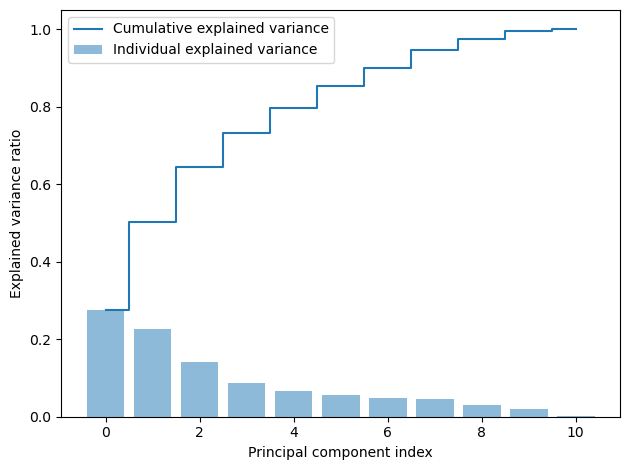

In [21]:
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/Users/antra/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



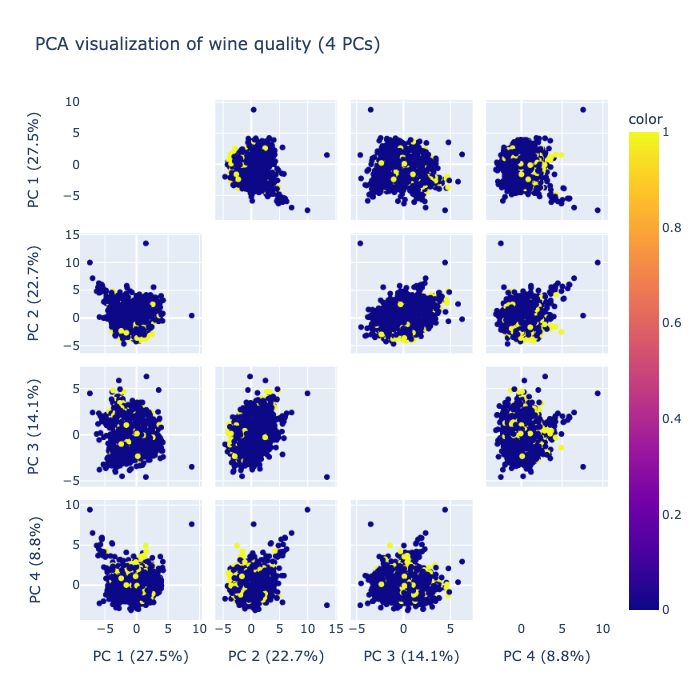

In [22]:
# Visualize a subset of PCs - number of components = 4, for quality of wine
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(explained_variance* 100)
}

fig = px.scatter_matrix(
    wine_pca,
    labels=labels,
    dimensions=range(4),
    color=wine["bestquality"],
    title = 'PCA visualization of wine quality (4 PCs)',
    height=700
)
fig.update_traces(diagonal_visible=False)
fig.show(renderer="png")
# PCA doesn't seem to create distinct clusters for quality

/Users/antra/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



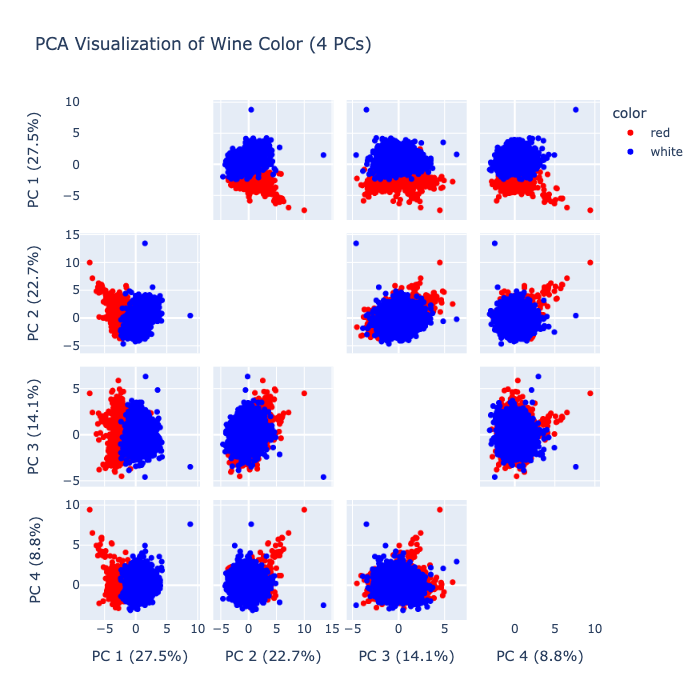

In [23]:
# Visualize a subset of PCs - number of components = 4, for color of wine
color_map = {"red": "red", "white": "blue"}

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(explained_variance * 100)
}

fig = px.scatter_matrix(
    wine_pca,
    labels=labels,
    dimensions=range(4),
    color=wine["color"],
    title='PCA Visualization of Wine Color (4 PCs)',
    height=700,
    color_discrete_map=color_map
)
fig.update_traces(diagonal_visible=False)
fig.show(renderer="png")

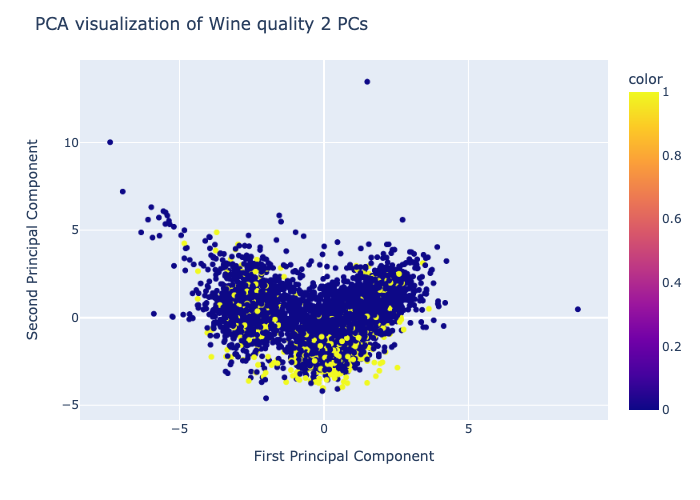

In [24]:
# using only 2 pcs - quality
fig = px.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], color=wine["bestquality"])
fig.update_layout(
    title="PCA visualization of Wine quality 2 PCs",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show(renderer="png")
# the two clusters are not distinct for quality

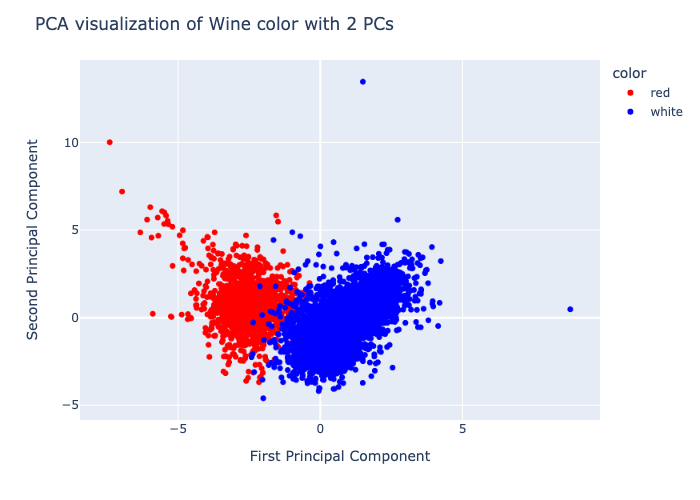

In [25]:
# using only 2 pcs - color

color_map = {"red": "red", "white": "blue"}

fig = px.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], color=wine["color"], color_discrete_map=color_map)

fig.update_layout(
    title="PCA visualization of Wine color with 2 PCs",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)

fig.show(renderer="png")
# there are two distinct clusters for wine color using 2 PCs with an exception of few datapoints

## Dimensionality reduction using t-SNE

In [26]:
# tsne
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(wine_properties_scaled)

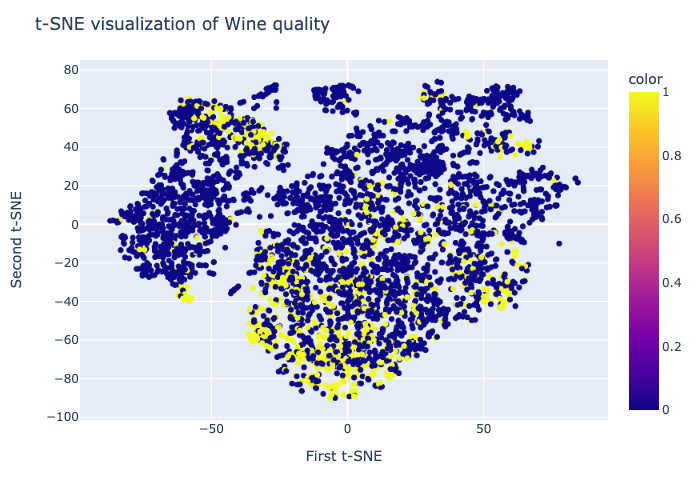

In [27]:
# quality of wine
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=wine["bestquality"])
fig.update_layout(
    title="t-SNE visualization of Wine quality",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show(renderer="png")
# the 2 clusters are not distinct

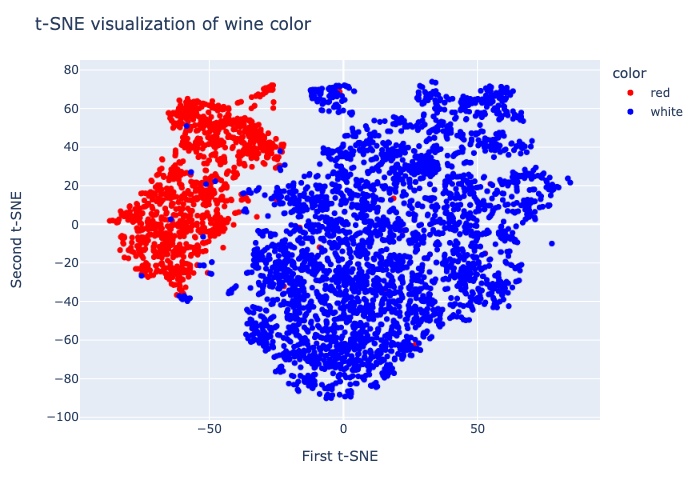

In [28]:
#color of wine

color_map = {"red": "red", "white": "blue"}

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=wine["color"], color_discrete_map=color_map)
fig.update_layout(
    title="t-SNE visualization of wine color",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show(renderer="png")

# the two clusters are distinct with an exception of few datapoints

### Determining optimal value of k for k-means using elbow curve method, silhouette analysis and by finding accuracy

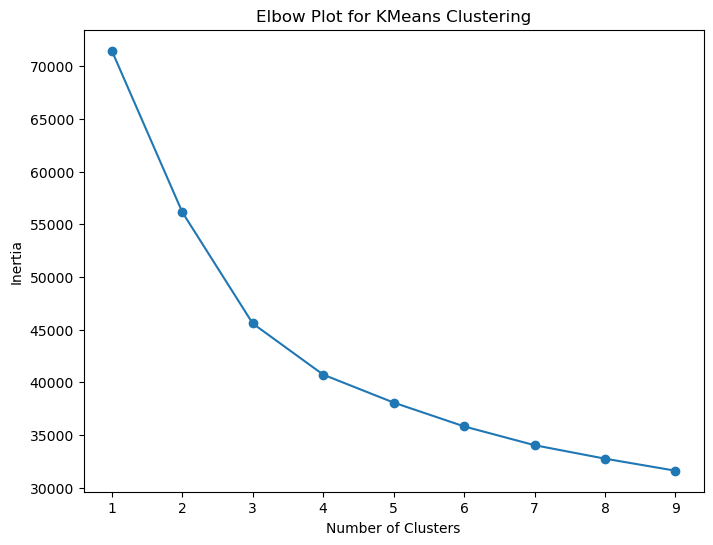

In [29]:
#Elbow curve method for finding optimal value of k
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(wine_properties_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.show()

#k=3 seems to be the optimal value of k

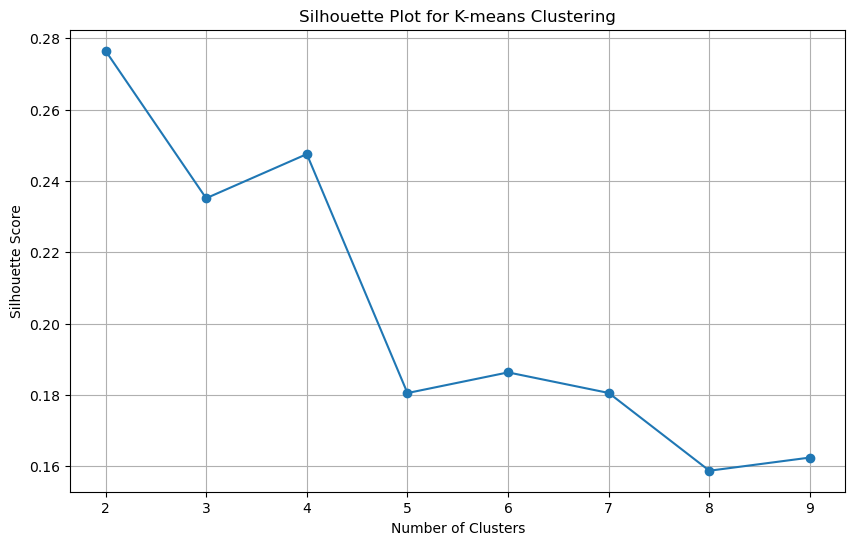

In [30]:
#Silhouette analysis for finding optimal value of k

cluster_range = range(2, 10)

silhouette_scores = []
kmeans_models = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(wine_properties_scaled)
    kmeans_models.append(kmeans)
    
    silhouette_avg = silhouette_score(wine_properties_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Plot for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

#k=2 seems to be the optimal value of k

### Determining accuracy for different number of clusters - wine quality

- Using elbow curve method we got k=3 as the optimal no: of clusters, whereas by silhouette analysis we got k=2 as the optimal number of clusters. Therefore, we'll check the accuracy for k=2 and 3 to find the optimal k
- Even though this is an unsupervised problem, since we have correct labels of wine color and wine quality, we can determine the accuracy of k-means clustering

In [31]:
# 2 clusters - quality

kmeans = KMeans(n_clusters=2, random_state=0,n_init=10)
kmeans.fit(wine_properties_scaled)

labels = kmeans.labels_
correct_labels = sum(wine.quality == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, wine.quality.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(wine.quality.size)))

Result: 0 out of 6497 samples were correctly labeled.
Accuracy score: 0.00


In [32]:
# 3 clusters - quality

kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(wine_properties_scaled)

labels = kmeans.labels_
correct_labels = sum(wine.quality == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, wine.quality.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(wine.quality.size)))

Result: 0 out of 6497 samples were correctly labeled.
Accuracy score: 0.00


In [33]:
# 7 clusters - quality

kmeans = KMeans(n_clusters=7, random_state=0,n_init=10)
kmeans.fit(wine_properties_scaled)

labels = kmeans.labels_
correct_labels = sum(wine.quality == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, wine.quality.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(wine.quality.size)))

Result: 120 out of 6497 samples were correctly labeled.
Accuracy score: 0.02


### Determining accuracy for different number of clusters - wine best quality

In [34]:
# 2 clusters - best quality

kmeans = KMeans(n_clusters=2, random_state=0,n_init=10)
kmeans.fit(wine_properties_scaled)

labels = kmeans.labels_
correct_labels = sum(wine.bestquality == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, wine.bestquality.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(wine.bestquality.size)))

Result: 4008 out of 6497 samples were correctly labeled.
Accuracy score: 0.62


In [35]:
# 3 clusters - best quality

kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(wine_properties_scaled)

labels = kmeans.labels_
correct_labels = sum(wine.bestquality == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, wine.bestquality.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(wine.bestquality.size)))

Result: 2287 out of 6497 samples were correctly labeled.
Accuracy score: 0.35


From our analysis we see that the accuracy of k-means clustering is the best for k=2 (0.62) for bestquality wine variable (low quality and high quality)

### Applying K-means clustering for distinguishing higher from lower quality wines

In [36]:
# 2 clusters - best quality

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(wine_properties_scaled)
centroid = kmeans.cluster_centers_
labels = kmeans.labels_
pred = kmeans.predict(wine_properties_scaled)

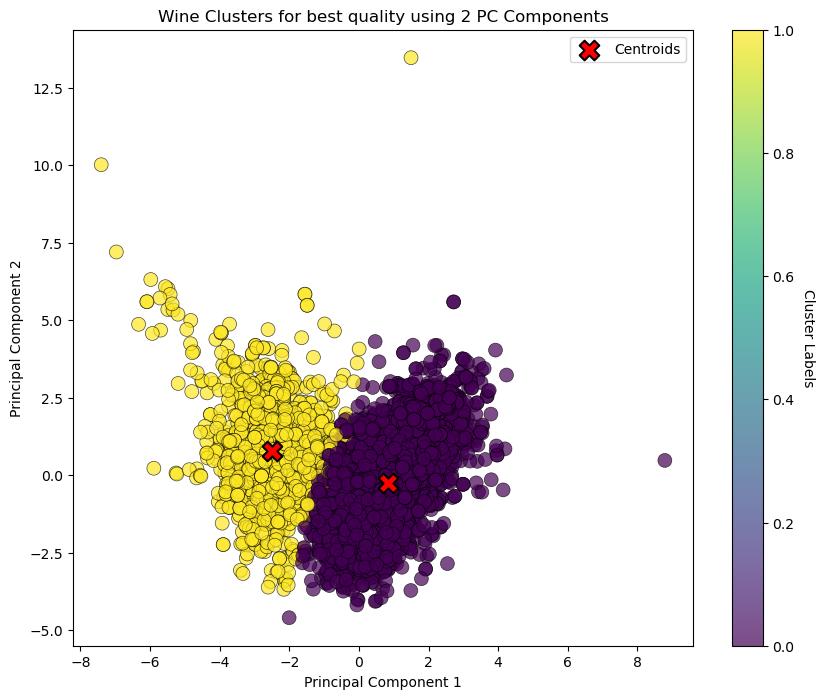

In [38]:
plt.figure(figsize=(10, 8))

centroids_pca = pca.transform(centroid)

x = wine_pca[:, 0]
y = wine_pca[:, 1]

# Scatter plot for data points with cluster labels
scatter = plt.scatter(x, y, c=labels, alpha=0.7, s=100, cmap='viridis', edgecolors='k', linewidths=0.5)

# Scatter plot for cluster centroids
centroids_scatter = plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', edgecolors="black", linewidths=1.5, label='Centroids')

plt.title('Wine Clusters for best quality using 2 PC Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(handles=[centroids_scatter], labels=['Centroids'], loc='upper right')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels', rotation=270, labelpad=15)

plt.show()


#### Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties.

- As visible from the visualization for wine color using PCA and t-sne, both methods - PCA and t-sne with number of components as 2 can distinguish the red wines from white wines.
- Even though t-sne can outperform pca in most cases, for our dataset we can proceed with pca since pca is computationally less intensive and we can control how much variance to preserve using eigen values in pca.

#### Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

- For wine quality, k-means clustering outperforms both pca and t-sne in terms of distinguishing between higher and lower quality wines. 
- Using elbow curve method we got k=3 as the optimal no: of clusters, whereas using silhouette analysis we got k=2 as the optimal number of clusters. So we further went on to determine the accuracy for k=2 and 3, and found that higher accuracy(0.62) was achieved with 2 clusters for best quality wine variable. 
- Hence, we applied k-means clustering with k=2 and used first two principal components since employing PCA before clustering is useful to reduce the dimensionality of our data and discard the noise. By doing PCA we are retaining all the important information and by retaining only the components with the highest variance, the clusters will be likely more visibile as seen in this plot (as they are most spread out).